In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_26.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0882,34.1223,16.0,270.0,2022-11-16 16:56:08.041108,2022-11-16 07:55:49,2022-11-16 04:19:07,under way using engine,184.436450,306.205403
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0609,34.1211,16.1,267.0,2022-11-16 17:01:11.033821,2022-11-16 08:00:55,2022-11-16 04:19:07,under way using engine,186.658612,312.035073
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6711,34.0831,16.1,262.0,2022-11-16 18:16:53.451054,2022-11-16 09:14:25,2022-11-16 04:19:07,under way using engine,220.108466,367.952814
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6067,34.0795,16.0,277.0,2022-11-16 18:26:58.801742,2022-11-16 09:26:25,2022-11-16 04:19:07,under way using engine,225.577733,374.509054
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.5502,34.0820,16.2,280.0,2022-11-16 18:42:07.917210,2022-11-16 09:37:09,2022-11-16 04:19:07,under way using engine,230.117608,387.353392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

224


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1325.7178036900816

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

66.28589018450408

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742
13.86009767772916


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.041176470588237
1 16.32
2 16.349999999999998
3 16.664285714285715
4 18.464285714285715
5 19.26
6 19.342857142857145
7 18.9
8 19.39090909090909
9 19.3
10 17.296153846153842
11 15.634482758620688
12 17.10909090909091
13 16.139999999999997
14 15.233333333333333
15 16.40344827586207
16 16.277777777777775
17 11.666666666666666
18 5.2749999999999995


In [19]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-11-19 22:24:43.599696
부산 도착 시각 2022-11-22 01:14:53.431509


In [67]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_20.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 8:
#         print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


In [68]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [69]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [70]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [63]:
stop_index = check_ATA(sample)

In [64]:
stop_index

176

In [66]:
sample.loc[stop_index-20:stop_index]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
156,215,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,128.8249,34.6442,12.2,51.0,2022-10-04 06:38:23.501312,2022-10-03 21:38:12,2022-10-03 09:31:06,under way using engine,36.186300,48.104228
157,216,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,128.8981,34.7067,12.8,42.0,2022-10-04 07:08:27.020171,2022-10-03 22:02:48,2022-10-03 10:07:09,under way using engine,30.101546,41.141265
158,217,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,128.9361,34.7929,6.3,319.0,2022-10-04 07:38:29.548488,2022-10-03 22:33:07,2022-10-03 10:37:05,under way using engine,22.344384,32.323881
159,218,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,128.9394,34.8124,3.0,257.0,2022-10-04 08:08:32.098003,2022-10-03 23:03:47,2022-10-03 11:07:07,under way using engine,20.621223,55.689075
160,219,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,128.9621,34.8258,2.5,316.0,2022-10-04 08:38:36.707444,2022-10-03 23:34:08,2022-10-03 11:25:06,under way using engine,20.613702,66.376962
161,220,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.9869,34.8347,2.3,324.0,2022-10-04 09:08:38.486865,2022-10-04 00:07:15,2022-10-04 12:07:05,under way using engine,21.405484,74.774125
162,221,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0090,34.8397,2.3,313.0,2022-10-04 09:38:47.862167,2022-10-04 00:37:21,2022-10-04 12:31:08,under way using engine,22.525990,78.688301
163,222,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0533,34.8530,3.0,291.0,2022-10-04 10:38:46.749751,2022-10-04 01:36:28,2022-10-04 01:25:07,under way using engine,24.955743,67.394753
164,223,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0290,34.8269,6.4,207.0,2022-10-04 11:08:53.837091,2022-10-04 02:07:18,2022-10-04 02:01:08,under way using engine,24.839431,35.584837
165,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0123,34.8078,0.9,195.0,2022-10-04 11:38:52.934934,2022-10-04 02:37:48,2022-10-04 02:31:04,under way using engine,25.161226,223.166539


In [37]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-10-04 19:09:35.172588')

# 감속률 적용

In [38]:
# 샘플 데이터는 20부터. 
for sam in sample.index[10:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [51]:
ddd = sample.loc[10:stop_index,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,69,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.5487,38.6867,7.0,98.0,2022-10-01 04:01:10.021277,2022-09-30 18:50:07,2022-09-30 06:55:09,under way using engine,922.234587,1256.276557,2022-10-04 18:13:10.021277,2022-10-04 19:09:35.172588,0 days 00:56:25.151311
11,70,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.6639,38.6775,9.2,102.0,2022-10-01 04:31:12.647427,2022-09-30 19:30:39,2022-09-30 07:18:59,under way using engine,912.678061,1142.064365,2022-10-03 22:04:12.647427,2022-10-04 19:09:35.172588,0 days 21:05:22.525161
12,71,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.7309,38.6734,9.3,98.0,2022-10-01 05:01:16.124454,2022-09-30 19:51:18,2022-09-30 07:49:11,under way using engine,907.183183,1134.342895,2022-10-03 21:50:16.124454,2022-10-04 19:09:35.172588,0 days 21:19:19.048134
13,72,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.8229,38.6681,9.3,102.0,2022-10-01 05:31:18.992113,2022-09-30 20:19:22,2022-09-30 08:19:08,under way using engine,899.661927,1124.938307,2022-10-03 22:20:18.992113,2022-10-04 19:09:35.172588,0 days 20:49:16.180475
14,73,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.9348,38.6613,9.3,105.0,2022-10-01 06:01:21.930901,2022-09-30 20:53:37,2022-09-30 08:49:07,under way using engine,890.511790,1113.496965,2022-10-03 22:50:21.930901,2022-10-04 19:09:35.172588,0 days 20:19:13.241687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,147.954666,2022-10-05 13:44:21.070551,2022-10-04 19:09:35.172588,0 days 18:34:45.897963
172,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,289.085158,2022-10-06 11:58:25.539071,2022-10-04 19:09:35.172588,1 days 16:48:50.366483
173,232,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,227.167731,2022-10-06 03:54:27.899400,2022-10-04 19:09:35.172588,1 days 08:44:52.726812
174,233,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,121.543658,2022-10-05 13:11:30.569093,2022-10-04 19:09:35.172588,0 days 18:01:55.396505


In [52]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [53]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [54]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [55]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

In [61]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error


In [59]:
stop_index

519

In [56]:
ddd

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
10,69,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.5487,38.6867,7.0,98.0,2022-10-01 04:01:10.021277,2022-09-30 18:50:07,2022-09-30 06:55:09,under way using engine,922.234587,2022-10-04 18:13:10.021277,2022-10-04 19:09:35.172588,0 days 00:56:25.151311,0 days 11:09:35.172588
11,70,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.6639,38.6775,9.2,102.0,2022-10-01 04:31:12.647427,2022-09-30 19:30:39,2022-09-30 07:18:59,under way using engine,912.678061,2022-10-03 22:04:12.647427,2022-10-04 19:09:35.172588,0 days 21:05:22.525161,0 days 11:09:35.172588
12,71,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.7309,38.6734,9.3,98.0,2022-10-01 05:01:16.124454,2022-09-30 19:51:18,2022-09-30 07:49:11,under way using engine,907.183183,2022-10-03 21:50:16.124454,2022-10-04 19:09:35.172588,0 days 21:19:19.048134,0 days 11:09:35.172588
13,72,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.8229,38.6681,9.3,102.0,2022-10-01 05:31:18.992113,2022-09-30 20:19:22,2022-09-30 08:19:08,under way using engine,899.661927,2022-10-03 22:20:18.992113,2022-10-04 19:09:35.172588,0 days 20:49:16.180475,0 days 11:09:35.172588
14,73,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.9348,38.6613,9.3,105.0,2022-10-01 06:01:21.930901,2022-09-30 20:53:37,2022-09-30 08:49:07,under way using engine,890.511790,2022-10-03 22:50:21.930901,2022-10-04 19:09:35.172588,0 days 20:19:13.241687,0 days 11:09:35.172588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,2022-10-05 13:44:21.070551,2022-10-04 19:09:35.172588,0 days 18:34:45.897963,0 days 09:09:35.172588
172,231,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,2022-10-06 11:58:25.539071,2022-10-04 19:09:35.172588,1 days 16:48:50.366483,0 days 09:09:35.172588
173,232,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,2022-10-06 03:54:27.899400,2022-10-04 19:09:35.172588,1 days 08:44:52.726812,0 days 09:09:35.172588
174,233,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,2022-10-05 13:11:30.569093,2022-10-04 19:09:35.172588,0 days 18:01:55.396505,0 days 09:09:35.172588


에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [57]:
ddd["error"].max()

Timedelta('107 days 06:27:48.574443')

In [58]:
ddd["error"].mean()

Timedelta('3 days 19:10:44.128308626')

In [47]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
159,218,COSCO FOS,KRBNP,2022-10-04 08:00:00,128.9394,34.8124,3.0,257.0,2022-10-04 08:08:32.098003,2022-10-03 23:03:47,2022-10-03 11:07:07,under way using engine,20.621223,2022-10-04 19:33:32.098003,2022-10-04 19:09:35.172588,0 days 00:23:56.925415,0 days 11:09:35.172588
10,69,COSCO FOS,KRBNP,2022-10-04 08:00:00,119.5487,38.6867,7.0,98.0,2022-10-01 04:01:10.021277,2022-09-30 18:50:07,2022-09-30 06:55:09,under way using engine,922.234587,2022-10-04 18:13:10.021277,2022-10-04 19:09:35.172588,0 days 00:56:25.151311,0 days 11:09:35.172588
89,148,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.2322,35.2139,6.7,220.0,2022-10-02 20:05:02.276259,2022-10-02 11:04:43,2022-10-02 12:13:06,under way using engine,327.490665,2022-10-04 20:29:02.276259,2022-10-04 19:09:35.172588,0 days 01:19:27.103671,0 days 11:09:35.172588
168,227,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0444,34.8247,7.6,151.0,2022-10-04 13:09:01.327977,2022-10-04 04:06:04,2022-10-04 03:49:05,under way using engine,26.086101,2022-10-04 17:39:01.327977,2022-10-04 19:09:35.172588,0 days 01:30:33.844611,0 days 09:09:35.172588
130,189,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.6532,34.1324,10.1,132.0,2022-10-03 17:07:06.181952,2022-10-03 08:06:34,2022-10-02 12:13:06,under way using engine,304.533140,2022-10-04 17:20:06.181952,2022-10-04 19:09:35.172588,0 days 01:49:28.990636,0 days 11:09:35.172588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,172,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3948,35.1330,0.3,264.0,2022-10-03 08:36:14.543227,2022-10-02 23:35:24,2022-10-02 12:13:06,under way using engine,312.254365,2022-11-08 13:43:14.543227,2022-10-04 19:09:35.172588,34 days 18:33:39.370639,0 days 11:09:35.172588
114,173,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3977,35.1340,0.3,255.0,2022-10-03 09:06:20.649953,2022-10-03 00:05:53,2022-10-02 12:13:06,under way using engine,311.995457,2022-11-08 14:13:20.649953,2022-10-04 19:09:35.172588,34 days 19:03:45.477365,0 days 11:09:35.172588
73,132,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.0727,34.9816,0.2,231.0,2022-10-02 12:04:14.894538,2022-10-02 02:35:44,2022-10-02 12:13:06,under way using engine,341.359610,2022-11-25 19:47:14.894538,2022-10-04 19:09:35.172588,52 days 00:37:39.721950,0 days 11:09:35.172588
115,174,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.4004,35.1347,0.2,239.0,2022-10-03 09:40:13.803859,2022-10-03 00:39:54,2022-10-02 12:13:06,under way using engine,311.753380,2022-11-26 17:23:13.803859,2022-10-04 19:09:35.172588,52 days 22:13:38.631271,0 days 11:09:35.172588


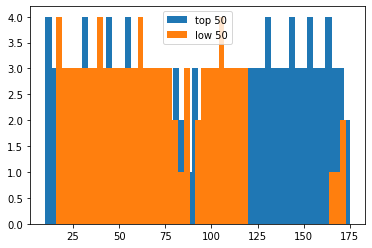

In [48]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [49]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       149
speed                                       7.2
timestamp            2022-10-02 20:35:05.350627
ETA                  2022-10-04 08:45:05.350627
error                    0 days 10:24:29.821961
remained_distance                    330.667864
Name: 90, dtype: object

In [50]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       127
speed                                      13.1
timestamp            2022-10-02 09:04:05.921879
ETA                  2022-10-03 09:48:05.921879
error                    1 days 09:21:29.250709
remained_distance                    348.070281
Name: 68, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [71]:
# 샘플 데이터는 20부터. 
for sam in sample.index[10:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [73]:
ddd = sample.loc[10:,:]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,69,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.5487,38.6867,7.0,98.0,2022-10-01 04:01:10.021277,2022-09-30 18:50:07,2022-09-30 06:55:09,under way using engine,922.234587,1256.276557,2022-10-02 16:49:10.021277,2022-10-04 19:09:35.172588,2 days 02:20:25.151311
11,70,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.6639,38.6775,9.2,102.0,2022-10-01 04:31:12.647427,2022-09-30 19:30:39,2022-09-30 07:18:59,under way using engine,912.678061,1142.064365,2022-10-02 17:19:12.647427,2022-10-04 19:09:35.172588,2 days 01:50:22.525161
12,71,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.7309,38.6734,9.3,98.0,2022-10-01 05:01:16.124454,2022-09-30 19:51:18,2022-09-30 07:49:11,under way using engine,907.183183,1134.342895,2022-10-02 17:49:16.124454,2022-10-04 19:09:35.172588,2 days 01:20:19.048134
13,72,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.8229,38.6681,9.3,102.0,2022-10-01 05:31:18.992113,2022-09-30 20:19:22,2022-09-30 08:19:08,under way using engine,899.661927,1124.938307,2022-10-02 18:19:18.992113,2022-10-04 19:09:35.172588,2 days 00:50:16.180475
14,73,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.9348,38.6613,9.3,105.0,2022-10-01 06:01:21.930901,2022-09-30 20:53:37,2022-09-30 08:49:07,under way using engine,890.511790,1113.496965,2022-10-02 18:49:21.930901,2022-10-04 19:09:35.172588,2 days 00:20:13.241687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365,NaT,NaT,NaT
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN,NaT,NaT,NaT
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487,NaT,NaT,NaT
186,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0773,0.1,91.0,2022-10-05 03:40:24.322710,2022-10-04 18:39:15,2022-10-04 06:25:09,moored,11.986756,956.448815,NaT,NaT,NaT


In [74]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd[10:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-02 19:34:39.986288,2022-10-04 19:09:35.172588,1 days 23:34:55.186300
21,80,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.7434,38.5786,13.5,102.0,2022-10-01 09:31:42.894382,2022-10-01 00:23:07,2022-09-30 11:55:11,under way using engine,823.219759,1167.289195,2022-10-02 20:04:42.894382,2022-10-04 19:09:35.172588,1 days 23:04:52.278206
22,81,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.8949,38.5366,19.4,107.0,2022-10-01 10:01:44.661562,2022-10-01 00:50:33,2022-10-01 12:49:05,under way using engine,809.355773,1714.957759,2022-10-02 20:34:44.661562,2022-10-04 19:09:35.172588,1 days 22:34:50.511026
23,82,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.0784,38.4828,14.2,113.0,2022-10-01 10:31:47.135327,2022-10-01 01:23:40,2022-10-01 01:31:09,under way using engine,792.414860,1170.234717,2022-10-02 18:48:47.135327,2022-10-04 19:09:35.172588,2 days 00:20:48.037261
24,83,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.2087,38.4376,12.9,115.0,2022-10-01 11:01:50.126019,2022-10-01 01:54:15,2022-10-01 01:55:09,under way using engine,780.027173,1071.427728,2022-10-02 19:18:50.126019,2022-10-04 19:09:35.172588,1 days 23:50:45.046569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,147.954666,2022-10-04 19:16:21.070551,2022-10-04 19:09:35.172588,0 days 00:06:45.897963
172,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,289.085158,2022-10-04 20:05:25.539071,2022-10-04 19:09:35.172588,0 days 00:55:50.366483
173,232,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,227.167731,2022-10-04 20:35:27.899400,2022-10-04 19:09:35.172588,0 days 01:25:52.726812
174,233,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,121.543658,2022-10-04 21:05:30.569093,2022-10-04 19:09:35.172588,0 days 01:55:55.396505


In [75]:
ddd['error'].mean()

Timedelta('1 days 03:27:51.960773783')

In [76]:
ddd['error'].max()

Timedelta('2 days 02:20:25.151311')

In [77]:
ddd.sort_values(by="error")[['index', "speed",'timestamp',"ETA","error",'remained_distance' ]].head(50).index.values

array([171, 172, 173, 174, 170, 175, 169, 168, 167, 166, 165, 164, 163,
       162, 161, 160, 159, 158, 153, 157, 152, 147, 156, 151, 146, 155,
       141, 150, 145, 154, 149, 136, 144, 140, 148, 135, 143, 139, 130,
       134, 142, 138, 129, 133, 124, 137, 128, 132, 123, 127], dtype=int64)

In [78]:
ddd.sort_values(by="error")[['index', "speed",'timestamp',"ETA","error",'remained_distance' ]].tail(50).index.values

array([50, 57, 64, 60, 49, 56, 59, 48, 55, 47, 54, 46, 53, 45, 52, 36, 44,
       40, 35, 43, 39, 34, 38, 42, 29, 37, 41, 33, 28, 32, 27, 22, 31, 26,
       21, 30, 16, 25, 20, 15, 24, 19, 14, 23, 18, 13, 17, 12, 11, 10],
      dtype=int64)

In [116]:
ddd.index[0]

20

In [117]:
ddd.index[-1]

227

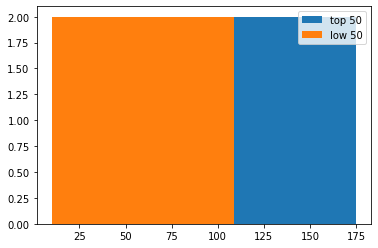

In [79]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [80]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       190
speed                                      11.2
timestamp            2022-10-03 17:37:07.717440
ETA                  2022-10-04 05:47:07.717440
error                    0 days 13:22:27.455148
remained_distance                    299.229044
Name: 131, dtype: object

In [81]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       120
speed                                      12.4
timestamp            2022-10-02 05:33:37.445472
ETA                  2022-10-03 02:09:37.445472
error                    1 days 16:59:57.727116
remained_distance                    385.517886
Name: 61, dtype: object